In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import re
import matplotlib.pyplot as plt

In [3]:
loan_df=pd.read_csv('loan.csv')

C:\Users\chait\AppData\Local\Temp\ipykernel_9344\2888986811.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df=pd.read_csv('loan.csv')


In [4]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Cleaning data 

#### We can observe there are a bunch of empty columns and some almost empyty columns, which dont contibute to the analysis. Removing columns which are more than 90% empty.


In [5]:
loan_df=loan_df[loan_df.columns[100*loan_df.isna().sum(axis=0)/len(loan_df)<90]]

In [6]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
loan_df.shape

(39717, 55)

In [8]:
loan_df['pymnt_plan'].unique()

array(['n'], dtype=object)

### There are a bunch of single valued columns. Dropping them as they can not contribute to our analysis.

In [9]:
loan_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   term                      39717 non-null  object 
 6   int_rate                  39717 non-null  object 
 7   installment               39717 non-null  float64
 8   grade                     39717 non-null  object 
 9   sub_grade                 39717 non-null  object 
 10  emp_title                 37258 non-null  object 
 11  emp_length                38642 non-null  object 
 12  home_ownership            39717 non-null  object 
 13  annual_inc                39717 non-null  float64
 14  verifi

 ### Also removing some more columns based on the type of information they provide.
 - id,member_id are just conventional columns, zip_code,addr_state,emp_title,url,desc,purpose,zip_code can also be removed as they dont contribute to finding loan defaults.
 - mths_since_last_delinq is less usefull than delinq_2yrs, but delinq_2yrs is highly skewed and more than 38k values are between 0-3 times, by which we cant judge the default tendency of the borrower.
 - recoveries and collection_recovery_fee are duplicate, so one can be removed.
 - out_prncp, chargeoff_within_12_mths, total_rec_late_fee, last_pymnt_amnt, revol_bal are un corrilated to the case statement and can be removed.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

In [11]:
loan_df.drop(['out_prncp', 'chargeoff_within_12_mths', 'total_rec_late_fee', 'last_pymnt_amnt', 'revol_bal','id','member_id','url','title','emp_title','zip_code','addr_state','desc','delinq_2yrs','mths_since_last_delinq'],axis = 1, inplace = True)

In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

####  Identifing and removing the rows with more the 5 empty values among 31 columns.


In [13]:
loan_df=loan_df.drop(loan_df[loan_df.isnull().sum(axis=1)>5].index,axis=0)

In [14]:
loan_df.shape

(39717, 31)

##### None present.

### Creating new columns based on the existing ones and casting the type of columns for more utility.
- Creating new column from the date of issue with only month.

In [15]:
loan_df['issue_d_mon']=loan_df['issue_d'].apply(lambda x: x.split('-')[0])

In [16]:
loan_df.shape

(39717, 32)

- Converting the interest rate column to float values.

In [17]:
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda a: float(a.split('%')[0]))

In [18]:
loan_df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

- Creating a new column based on installment and annual income.

In [19]:
loan_df['ins_inc']=loan_df['installment']/(loan_df['annual_inc']*12)

In [20]:
loan_df['ins_inc'].head()

0    0.000566
1    0.000166
2    0.000574
3    0.000575
4    0.000071
Name: ins_inc, dtype: float64

#### Filling empty values with a non existant value to facilitate the analysis.
- The emp_length has 1075 null values. This would be an impediment when analysis
- So filling them with "99 years", a random distinct value which can be identified easily and can be ignored when analysing.
- The type of column is object. Here we are removing the text part and converting to integers.
- Now any analysis involving this column would be easier.

In [21]:
loan_df['emp_length']=loan_df['emp_length'].fillna('99 years')
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: re.findall('\d+',str(x)))
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x[-1])

In [22]:
loan_df['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
99    1075
Name: emp_length, dtype: int64

### Removing outliers

In [23]:
loan_df['annual_inc'].describe([0.5,.075,0.8,0.9,0.95,0.96,0.97,0.98,0.99])/10

count      3971.700000
mean       6896.892638
std        6379.376579
min         400.000000
7.5%       2677.758200
50%        5900.000000
80%        9000.000000
90%       11600.000000
95%       14200.000000
96%       15000.000000
97%       16575.792000
98%       18700.000000
99%       23499.936000
max      600000.000000
Name: annual_inc, dtype: float64

<Axes: >

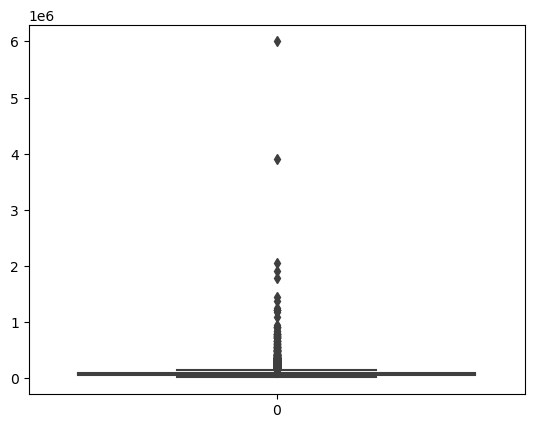

In [24]:
sb.boxplot(loan_df['annual_inc'])

- we can see the outliers are only on the upper side. Now removing them, considering anything above 95%lie is outlier.

In [25]:
 loan_df=loan_df[loan_df['annual_inc']<=140000]

<Axes: >

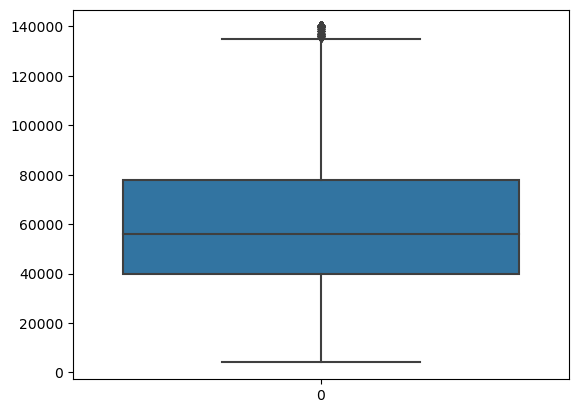

In [26]:
sb.boxplot(loan_df['annual_inc'])

- Now its a lot cleaner, examining similarly for loan_amnt column

In [27]:
loan_df['loan_amnt'].describe([0.1,0.2,0.5,.075,0.8,0.9,0.95,0.96,0.97,0.98,0.99])

count    37696.000000
mean     10843.220766
std       7153.349264
min        500.000000
7.5%      3000.000000
10%       3000.000000
20%       5000.000000
50%       9600.000000
80%      16000.000000
90%      20400.000000
95%      25000.000000
96%      25000.000000
97%      27000.000000
98%      30000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: >

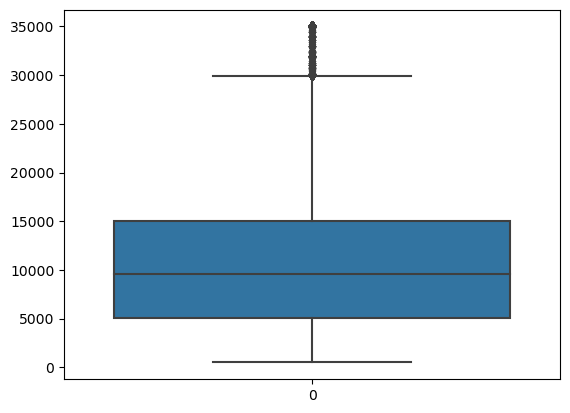

In [28]:
sb.boxplot(loan_df['loan_amnt'])

- Though there is a large gap from 75th percentile to 95th percentile, the data is clumped up there are may provide usefull info, so not cleaning for loan_amnt.

#### Now Examining for dti column

In [29]:
loan_df['dti'].describe([0.1,0.2,0.5,.075,0.8,0.9,0.95,0.96,0.97,0.98,0.99])

count    37696.000000
mean        13.493982
std          6.667800
min          0.000000
7.5%         3.280000
10%          4.215000
20%          7.180000
50%         13.630000
80%         19.900000
90%         22.430000
95%         23.890000
96%         24.230000
97%         24.570000
98%         24.910000
99%         26.750500
max         29.990000
Name: dti, dtype: float64

<Axes: >

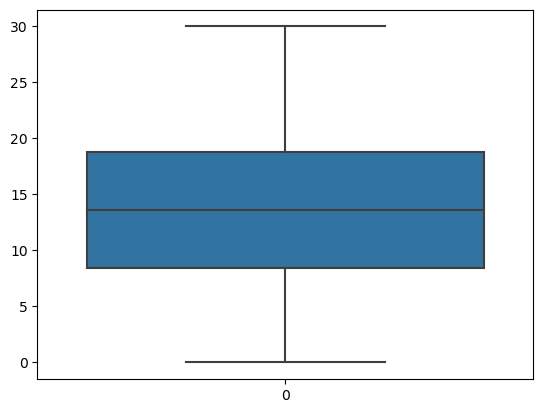

In [30]:
sb.boxplot(loan_df['dti'])

- The dti column looks clean, so no modification here also.

### Analysis and Visualisation

#### Our aim to find potential loan defaulters and borrowers who are safe to provide the loan.

- Before analysis creating bins for better clarity

In [31]:
def emp_len_bin(a):
    if a>=0 and a<3:
        return '0-2'
    elif a>=3 and a<6:
        return '2-5'
    elif a>=6 and a<10:
        return '5-8'
    elif a<=10:
        return '8-10'
    else:
        return 'other'
def annual_inc_bin(a):
    if a>=0 and a<30000:
        return '0-30k'
    elif a>=30000 and a<50000:
        return '30k-50k'
    elif a>=50000 and a<70000:
        return '50k-70k'
    elif a>=70000 and a<80000:
        return '70k-80k'
    elif a>=80000 and a<90000:
        return '80k-90k'
    elif a>=100000:
        return 'above 100k'
    else:
        return 'other'

In [32]:
loan_df['dti_bins'] = pd.cut(loan_df['dti'], bins=4,precision =0,labels=['0-7','7-15','15-22','22-30'])
loan_df['emp_length']=loan_df['emp_length'].astype(int)
loan_df['emp_length_bins'] = loan_df['emp_length'].apply(lambda x: emp_len_bin(x))
loan_df['interest_rate_bins'] = pd.cut(loan_df['dti'], bins=10,precision =0,labels=['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24','24-27','27-30'])
loan_df['installment_bins'] = pd.cut(loan_df['installment'], bins=4,precision =0,labels=['0-7','7-15','15-22','22-30'])
loan_df['annual_inc_bins'] = loan_df['annual_inc'].apply(lambda x: annual_inc_bin(x))
loan_df['loan_amnt_bins'] = pd.cut(loan_df['loan_amnt'], bins=8,precision =0,labels=['0-5k','5k-9k','9k-13k','13k-18k','18k-22k','22k-27k','27k-30k','30k-35k'])

### Univariant Analysis

#### loan status categories

<Axes: xlabel='loan_status', ylabel='count'>

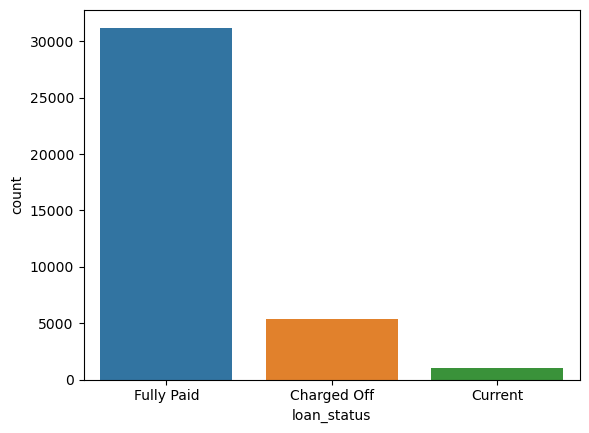

In [33]:
sb.countplot(x='loan_status',data=loan_df)

#### Analysis of Charged_off wrt grade

<Axes: xlabel='grade', ylabel='count'>

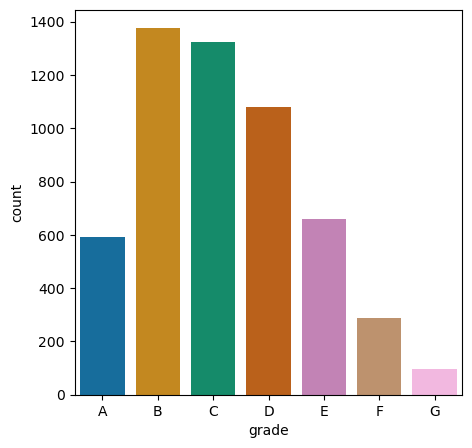

In [34]:
fig, ax = plt.subplots(figsize=(5,5))
sb.set_palette('colorblind')
sb.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,data = loan_df[loan_df['loan_status'] == 'Charged Off'])

#### Analysis of Charged_off wrt Employment length of the borrower

<Axes: xlabel='emp_length', ylabel='count'>

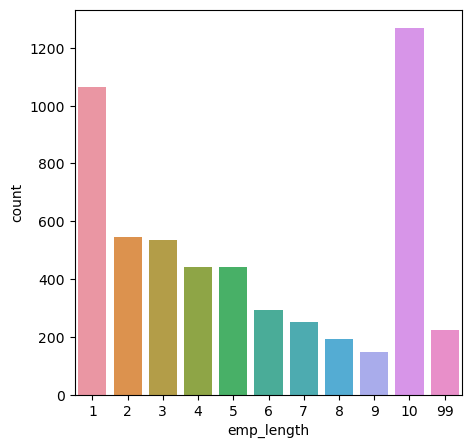

In [35]:
fig, ax = plt.subplots(figsize=(5,5))
sb.set_palette('colorblind')
sb.countplot(x='emp_length',data=loan_df[loan_df['loan_status']=="Charged Off"])

#### Analysis of Charged_off wrt dti

<Axes: xlabel='dti_bins', ylabel='count'>

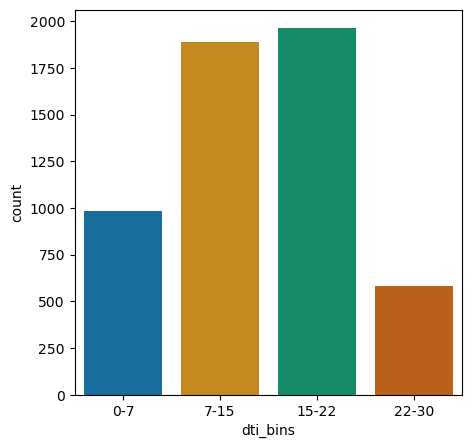

In [37]:
fig, ax = plt.subplots(figsize=(5,5))
sb.set_palette('colorblind')
sb.countplot(x='dti_bins',data=loan_df[loan_df['loan_status']=="Charged Off"])

#### Analysis wrt verification status

<Axes: xlabel='verification_status', ylabel='count'>

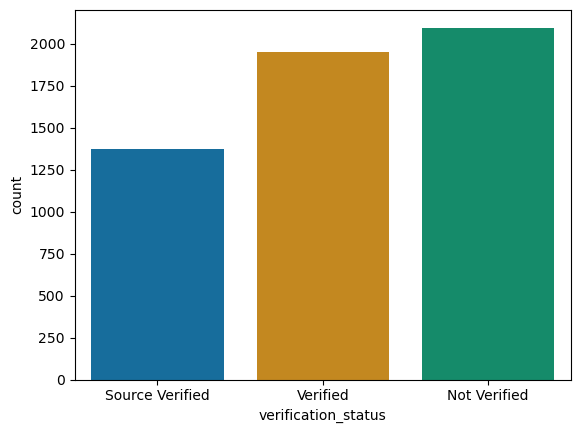

In [38]:
sb.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Loan Amount distribution

<Axes: xlabel='loan_amnt_bins', ylabel='count'>

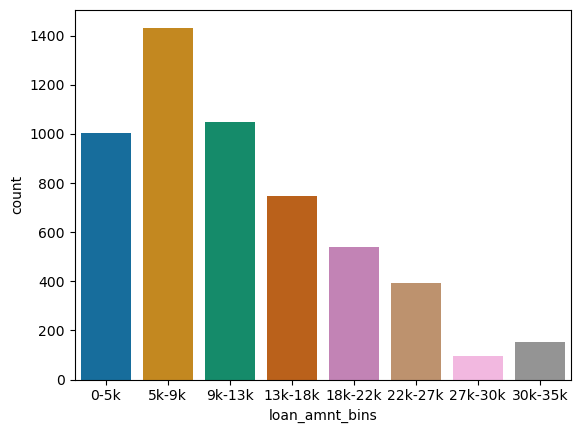

In [39]:
sb.countplot(x='loan_amnt_bins', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Charged off value distributuion in Purpose interest rate bins

<Axes: xlabel='interest_rate_bins', ylabel='count'>

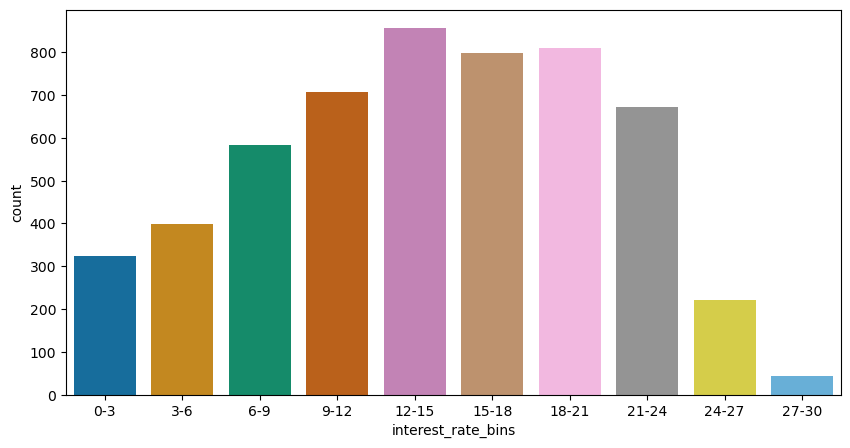

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
sb.set_palette('colorblind')
sb.countplot(x='interest_rate_bins',data=loan_df[loan_df['loan_status']=="Charged Off"])

#### Charged off value distributuion in Purpose categories  

<Axes: xlabel='count', ylabel='purpose'>

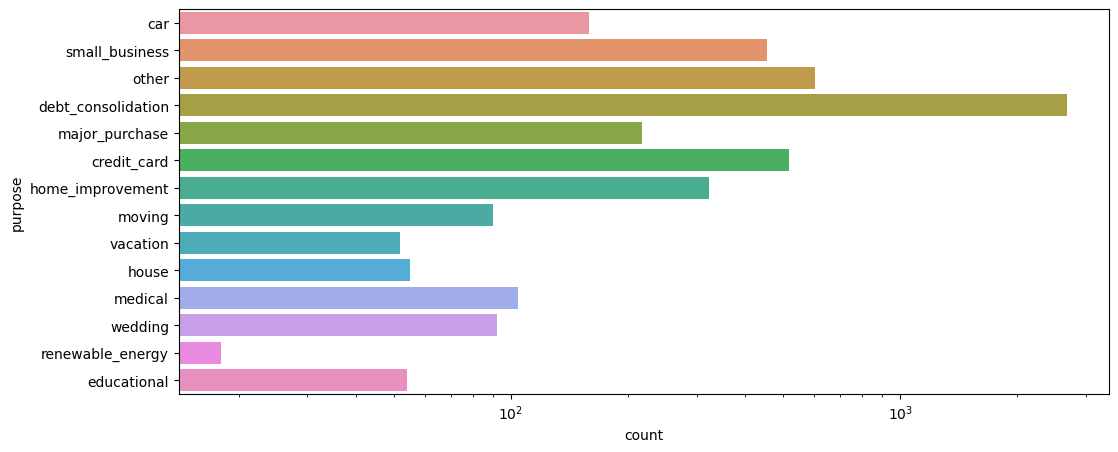

In [41]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set(xscale = 'log')
sb.countplot(y='purpose',data=loan_df[loan_df['loan_status']=="Charged Off"])

#### Fully Paid value distributuion in Purpose categories

<Axes: xlabel='count', ylabel='purpose'>

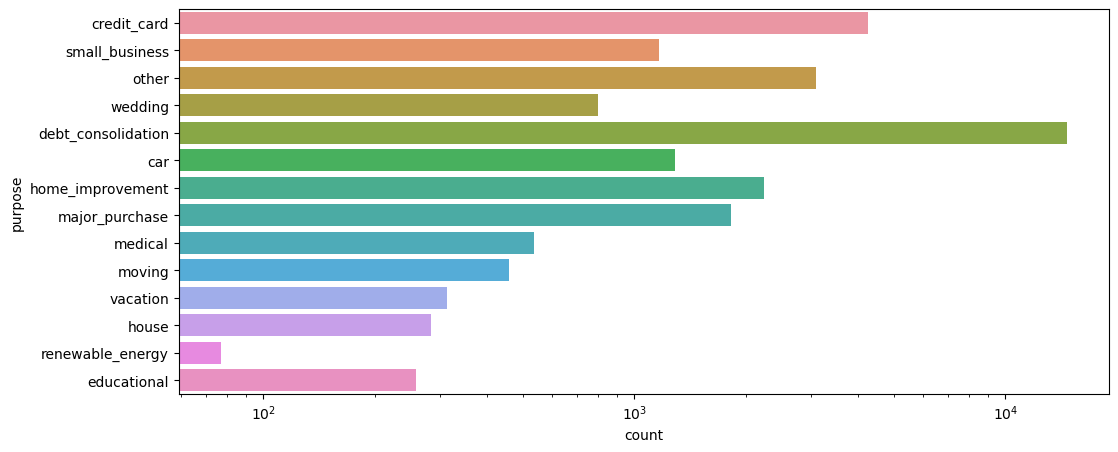

In [42]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set(xscale = 'log')
sb.countplot(y='purpose',data=loan_df[loan_df['loan_status']=="Fully Paid"])

#### Analysis Term column

<Axes: xlabel='term', ylabel='count'>

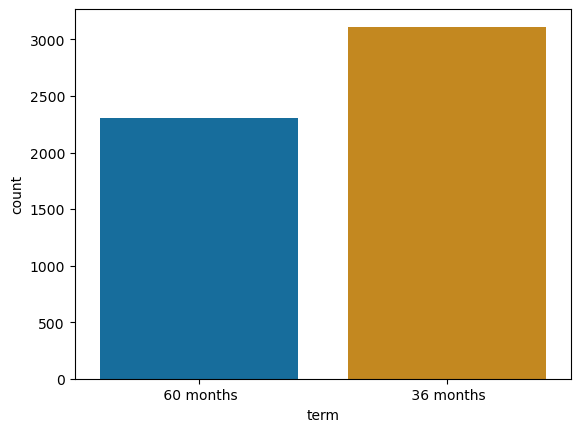

In [43]:
sb.countplot(x='term', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Analysis defaulters against the month of loan issued

<Axes: xlabel='issue_d_mon', ylabel='count'>

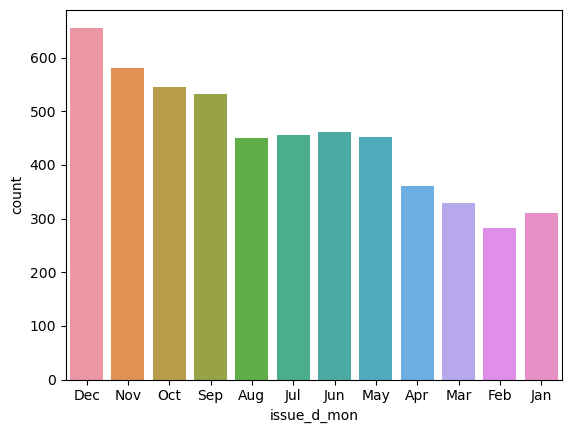

In [44]:
sb.countplot(x = 'issue_d_mon', data = loan_df[loan_df['loan_status']=='Charged Off'])

#### Analysing the defaulters and the kind of home ownership they got

<Axes: xlabel='home_ownership', ylabel='count'>

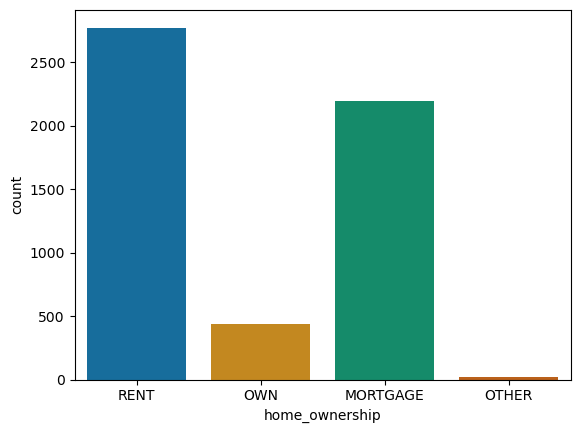

In [45]:
sb.countplot(x = 'home_ownership', data = loan_df[loan_df['loan_status']=='Charged Off'])

#### Analysing the defaulters and they the incomes they got.

<Axes: xlabel='annual_inc_bins', ylabel='count'>

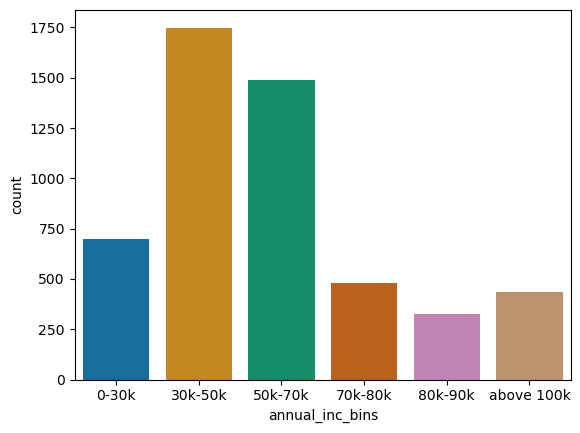

In [46]:
sb.countplot(x = 'annual_inc_bins', data = loan_df[loan_df['loan_status']=='Charged Off'],order=['0-30k','30k-50k','50k-70k','70k-80k','80k-90k','above 100k'])

#### Analysing the defaulters and the number of enquiries they had in last 6 months

<Axes: xlabel='inq_last_6mths', ylabel='count'>

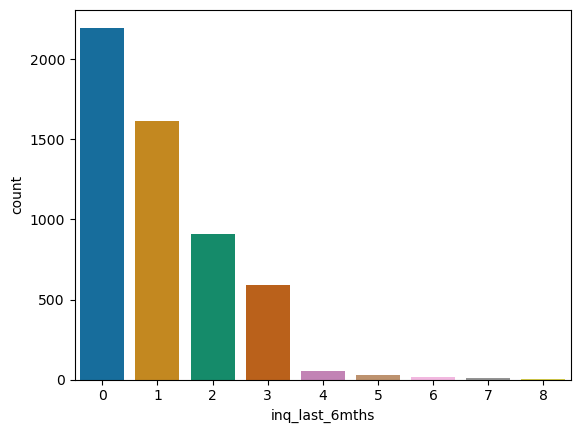

In [82]:
sb.countplot(x = 'inq_last_6mths', data = loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

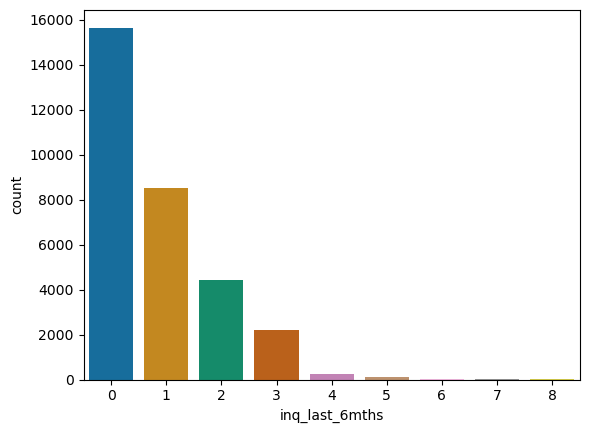

In [92]:
sb.countplot(x = 'inq_last_6mths', data = loan_df[loan_df['loan_status']=='Fully Paid'])

#### Analysing the Fully Paid and the number of years they were employed for.

<Axes: xlabel='count', ylabel='emp_length'>

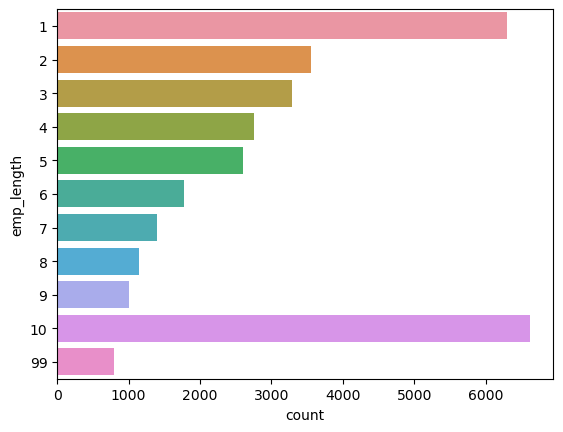

In [90]:
sb.countplot(y = 'emp_length', data = loan_df[loan_df['loan_status']=='Fully Paid'])

### Conclusions :
#### The defaulting potential is more under the following cases:
- When the annual income on the borrower is in range of 30k to 70k.
- When the borrower is on either RENT or having a MORTGAGE. Also people who own a house have very low chance of defaults.
- The term of 36 months has more chance of delinquency.
- When the number of enquires in last 6 months is 0.
- When the interest rates are from 12% to 20% the chances are more.
- Grade is B or C.
- When the loan amount is 5k-9k, delinquency is high.
- When the loan status is Not verified.
- When the reason is to clear off other debts/loans.
- When the borrowers employment length is 10+.
#### For some reason there is a steady increase in default possibility wrt the months accross all 4 years (Jan<Feb<....<Dec).
#### Also, as the length of employment increases, the loan delinquency decreases steadily till 9 years.
### If we avoid all the potential defaulters, loan for the rest of the borrowers can be granted.

## Bivariate Analysis

#### Let us see the trend of all the variables with Annual income, the key factor for any borrower to apply for loan.

#### Annual_income vs interest

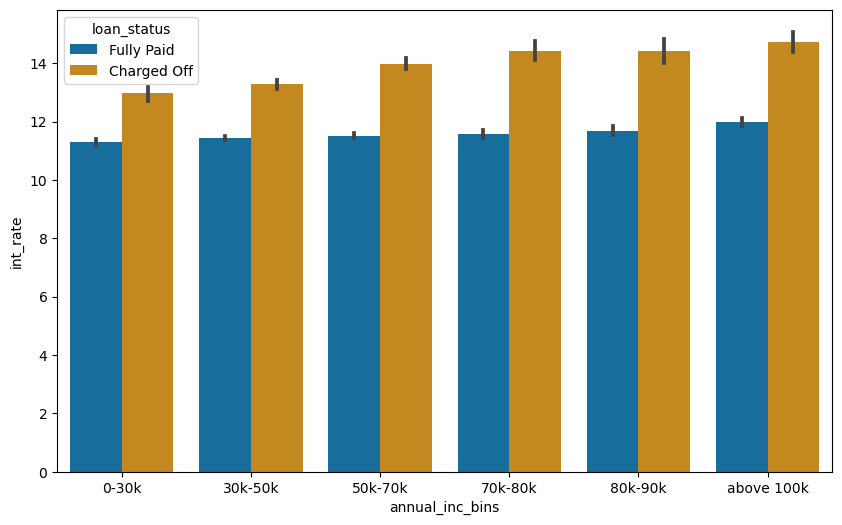

In [48]:
plt.figure(figsize=(10,6))
sb.barplot(order=['0-30k','30k-50k','50k-70k','70k-80k','80k-90k','above 100k'],data =loan_df[loan_df['loan_status']!='Current'],x='annual_inc_bins', y='int_rate', hue ='loan_status')
plt.show()

#### Annual_income vs purpose

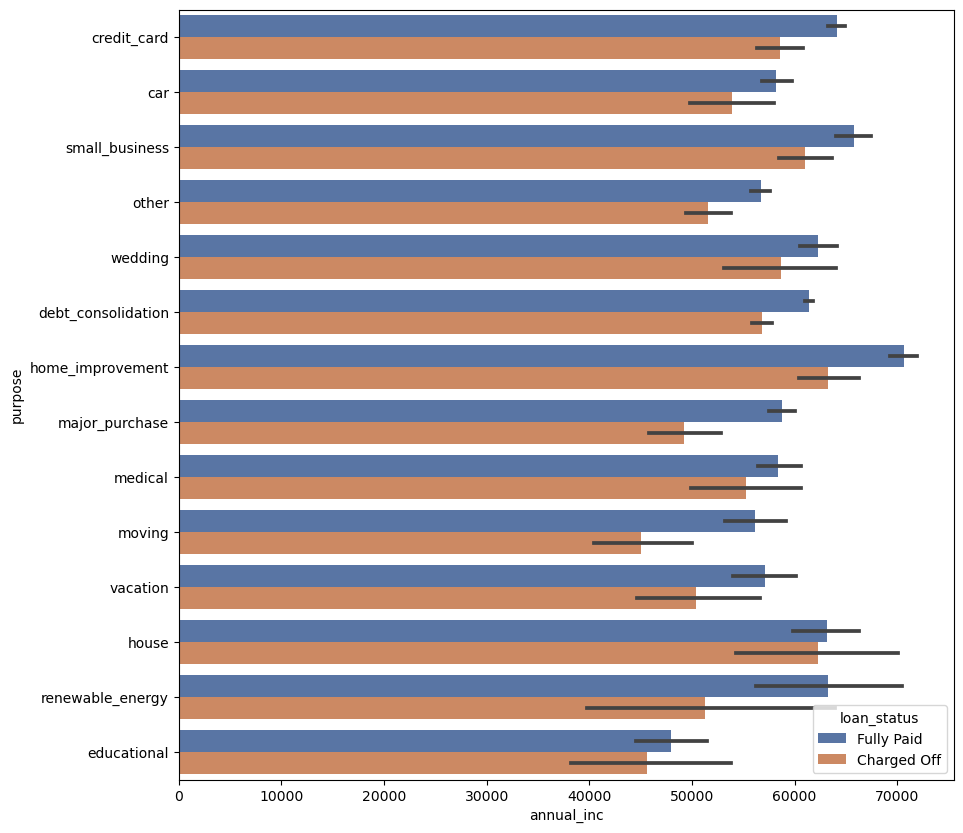

In [49]:
plt.figure(figsize=(10,10))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'],x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

#### Annual income vs home ownership

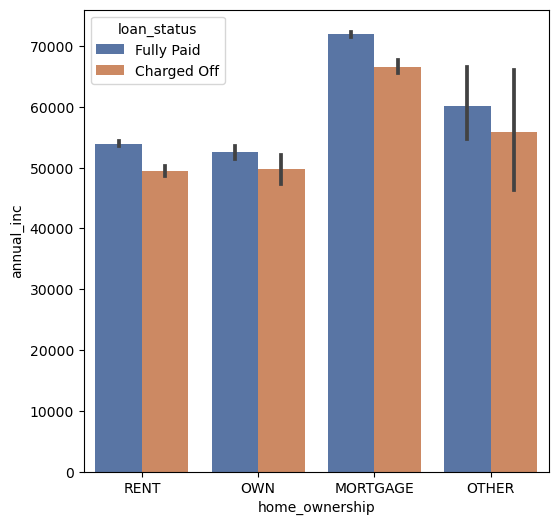

In [50]:
plt.figure(figsize=(6,6))
sb.barplot(order = ['RENT','OWN','MORTGAGE','OTHER'],data =loan_df[loan_df['loan_status']!='Current'],y='annual_inc', x='home_ownership', hue ='loan_status',palette="deep")
plt.show()

#### Annual income vs month of loan issued

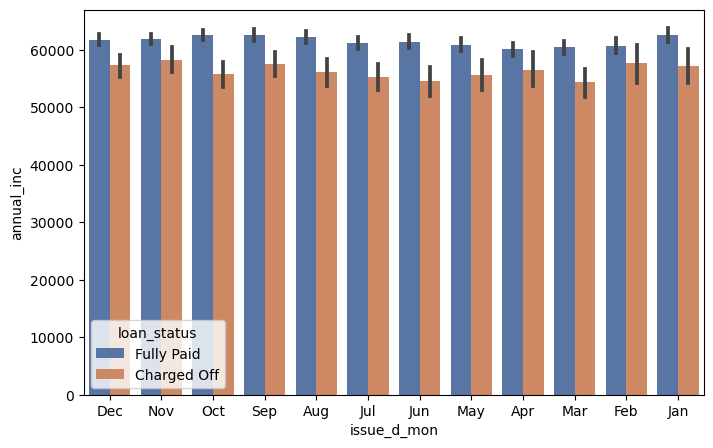

In [51]:
plt.figure(figsize=(8,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'],y='annual_inc', x='issue_d_mon', hue ='loan_status',palette="deep")
plt.show()

#### Annual income vs verification_status

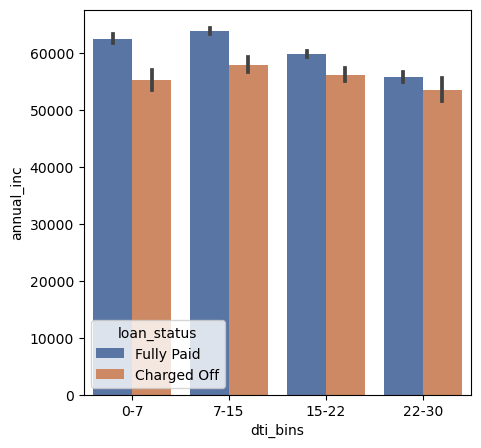

In [52]:
plt.figure(figsize=(5,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'],y='annual_inc', x='dti_bins', hue ='loan_status',palette="deep")
plt.show()

#### Annual income vs grade

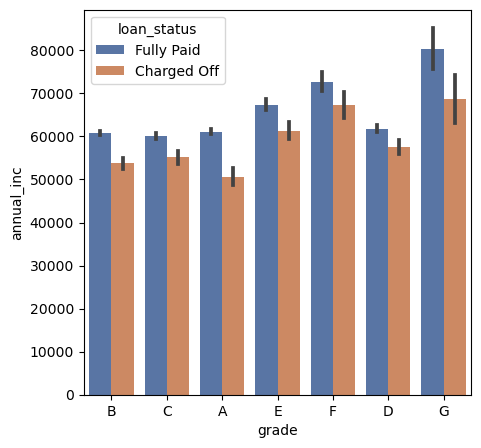

In [53]:
plt.figure(figsize=(5,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'],y='annual_inc', x='grade', hue ='loan_status',palette="deep")
plt.show()

#### Annual income vs verification_status

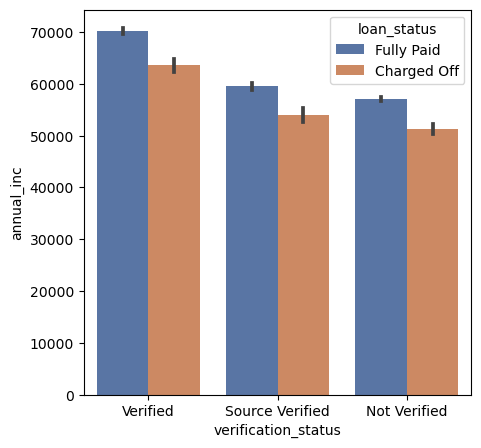

In [54]:
plt.figure(figsize=(5,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'],y='annual_inc', x='verification_status', hue ='loan_status',palette="deep")
plt.show()

#### Annual income vs loan amount

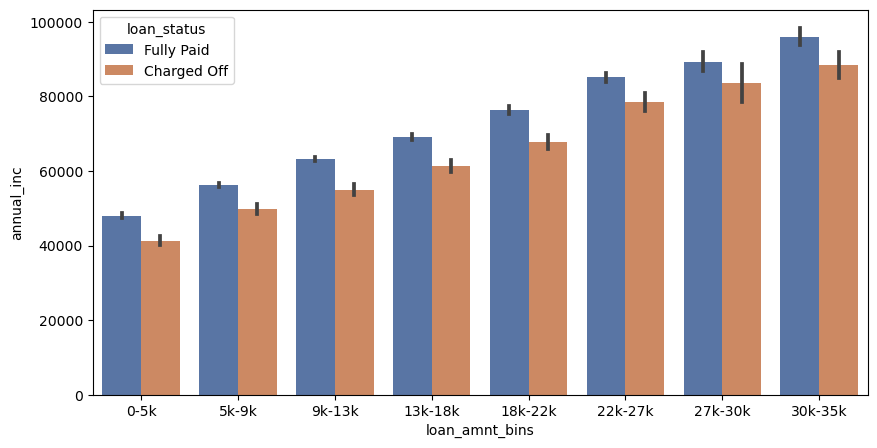

In [55]:
plt.figure(figsize=(10,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'], x='loan_amnt_bins' ,y='annual_inc',hue ='loan_status',palette="deep")
plt.show()

### People with higher income have taken higher loans.

#### DTI vs home_ownership

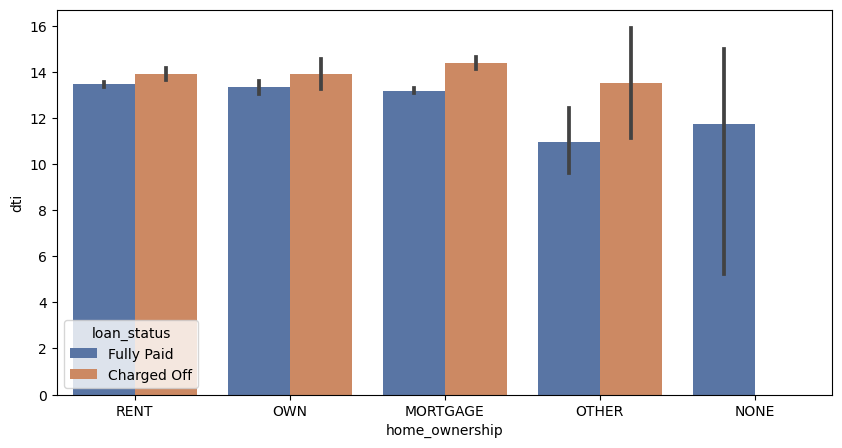

In [56]:
plt.figure(figsize=(10,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'],x='home_ownership',y='dti',hue ='loan_status',palette="deep")
plt.show()

### Observation:    Higher DTI resulting in Charge off across all home ownerships groups

#### DTI vs installment

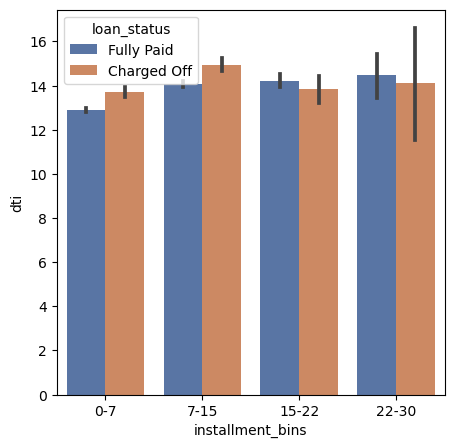

In [57]:
plt.figure(figsize=(5,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'],x='installment_bins',y='dti',hue ='loan_status',palette="deep")
plt.show()

### Observation: Higher DTI resulting in Charge off across all installment groups

#### DTI vs annual income

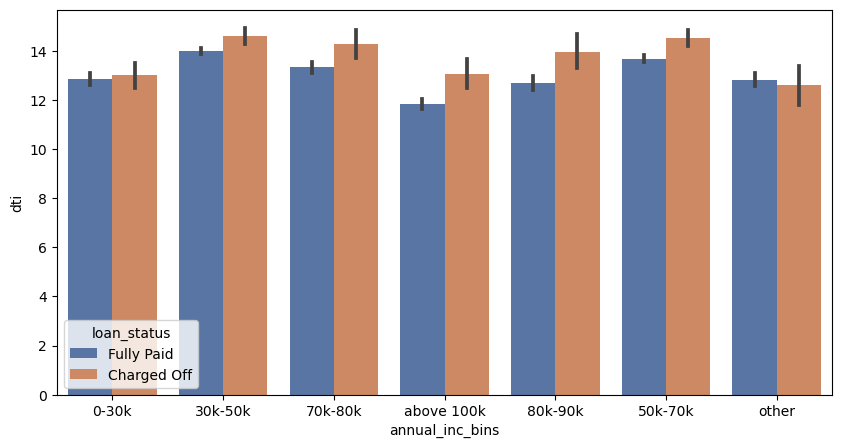

In [58]:
plt.figure(figsize=(10,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'],x='annual_inc_bins',y='dti',hue ='loan_status',palette="deep")
plt.show()

### Observation: Higher DTI resulting in Charge off across all income groups. From the above graphs we can see higher DTI always had more probality for defaults.

#### Interest rate vs Loan Amount

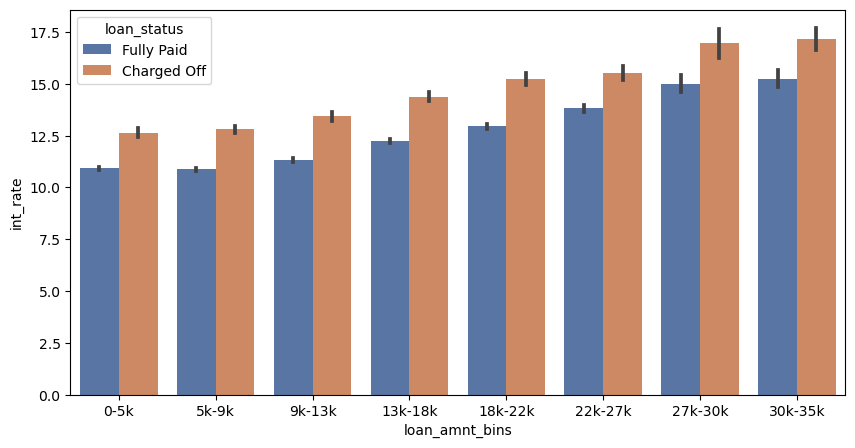

In [59]:
plt.figure(figsize=(10,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'],x='loan_amnt_bins',y='int_rate',hue ='loan_status',palette="deep")
plt.show()

### Within the same income group higher interest rate resulted in more defaults.

#### DTI vs interest rate

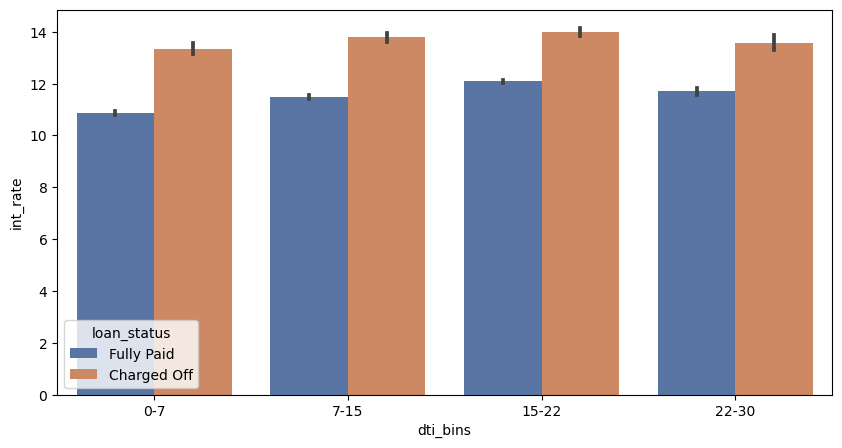

In [60]:
plt.figure(figsize=(10,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'],x='dti_bins',y='int_rate',hue ='loan_status',palette="deep")
plt.show()

### Among different DTI brackets higher interest rate is risky.

#### Interest rate vs grade

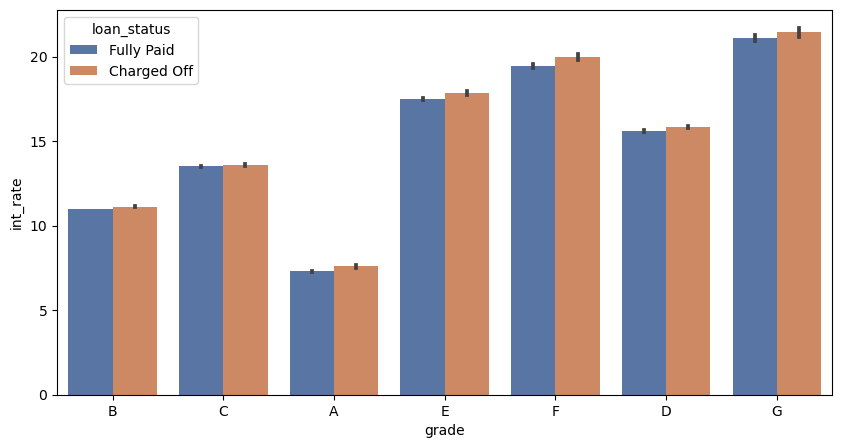

In [61]:
plt.figure(figsize=(10,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'],x='grade',y='int_rate',hue ='loan_status',palette="deep")
plt.show()

#### Loan amount vs annual income

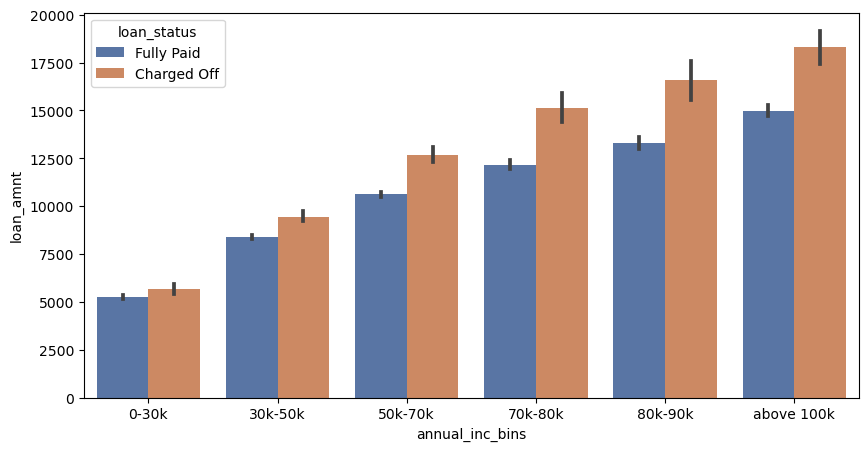

In [62]:
plt.figure(figsize=(10,5))
sb.barplot(order=['0-30k','30k-50k','50k-70k','70k-80k','80k-90k','above 100k'],data =loan_df[loan_df['loan_status']!='Current'], y='loan_amnt' ,x='annual_inc_bins',hue ='loan_status',palette="deep")
plt.show()

#### purpose vs interest rate

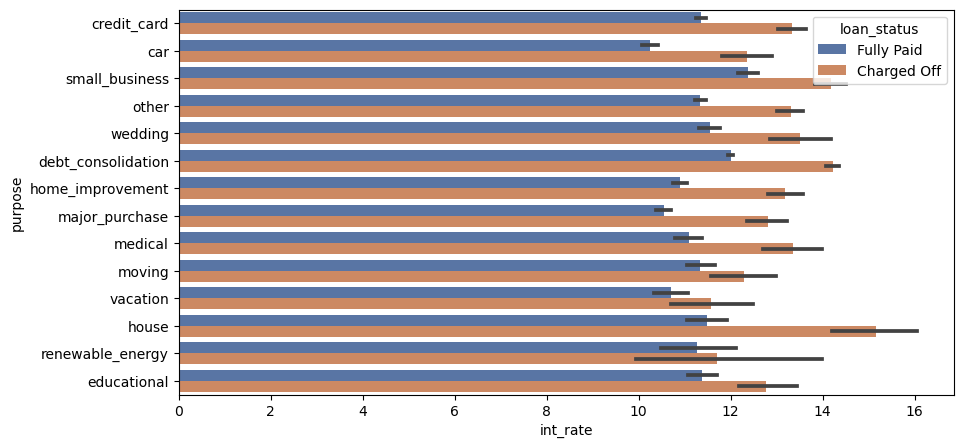

In [63]:
plt.figure(figsize=(10,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'], y='purpose' ,x='int_rate',hue ='loan_status',palette="deep")
plt.show()

#### Purpose vs Loan Amount

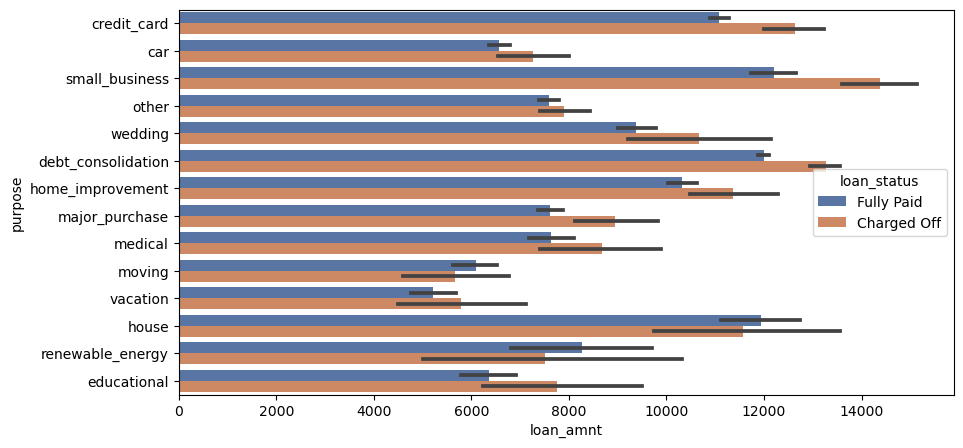

In [64]:
plt.figure(figsize=(10,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'], y='purpose' ,x='loan_amnt',hue ='loan_status',palette="deep")
plt.show()

#### Purpose vs ratio of installment to Annual income

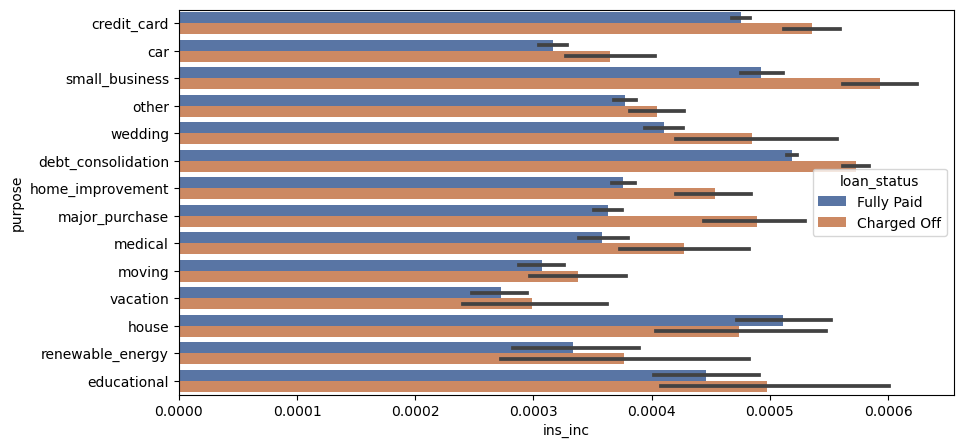

In [65]:
plt.figure(figsize=(10,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'], y='purpose' ,x='ins_inc',hue ='loan_status',palette="deep")
plt.show()

#### Interest rate vs ratio of installment to Annual income

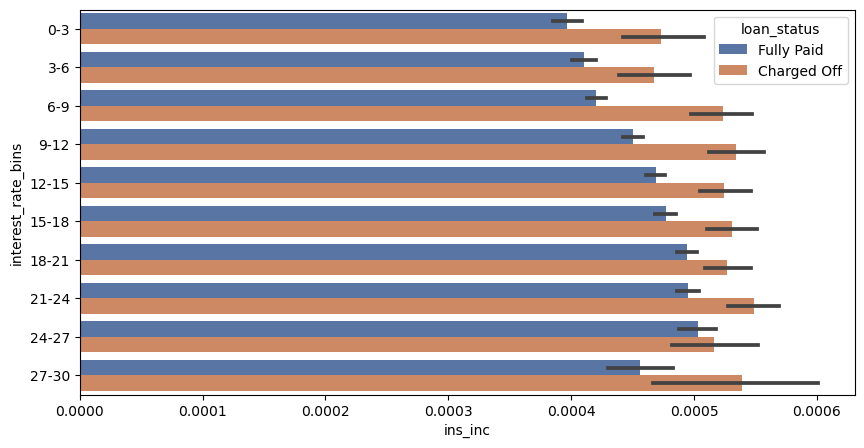

In [67]:
plt.figure(figsize=(10,5))
sb.barplot(data =loan_df[loan_df['loan_status']!='Current'], y='interest_rate_bins' ,x='ins_inc',hue ='loan_status',palette="deep")
plt.show()

### Observations:
- In all groups whenever interest rate is high the possibility of defauting is also high.
- Whenever the DTI is high, the possibility of defaulting is high. Also true for all brackets/groups.
- Across all the variables, the highrt the loan granted more is the possibility to default. So finding out the max amount which can be granted for each category would be helpful.
- Borrowers who are of small business and taking a loan of more than 12k are more likely to default.
- Borrowers with education loan more than 6k are having hard time closing it. Mostly student loan defaulters.
- Borrowers whose interest rate is more than 11% and is taking home loan are more likely to default.
- Borrowers with purpose debt repayment and interest rate more than 12% are more likely to default.
- Only for home loan,if the installment to monthly income ratio is high, then more likely the loan will be paid. Its False for all other loan purposes.

- Borrowers of Grade G with higher income are less likely to default.

#### If we avoid the potential defaulters we can provide the loan for the rest of Applicants.